In [136]:
import pandas as pd
import numpy as np
import json
import re
from llms import gemini
from llms import chatGPT
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
import plotly.express as px
from sklearn.manifold import TSNE
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib.utils import ImageReader
import plotly.io as pio


x_chat = chatGPT()
x_gemini = gemini()

In [137]:
df = pd.read_csv("../output/bls_df.csv",index_col=0)

df.example_task_embedding = df.example_task_embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])
df.onet_task_embedding = df.onet_task_embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])
df.onet_title_embedding = df.onet_title_embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])

In [42]:
# activities_df = pd.read_csv("../input/onet/embeddings/activity_embeddings.csv")
# activities_df.embedding = activities_df.embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])
# activity_embeddings = np.vstack(activities_df.embedding)
# task_embeddings = np.vstack(df.example_task_embedding)
# cosine_sim = cosine_similarity(task_embeddings, activity_embeddings, 'cosine')
# activities = list(activities_df.activity)
# df[activities] = cosine_sim
# skill_activity = pd.read_csv("../input/onet/Skills to Work Activities.csv")[["Work Activities Element Name","Skills Element Name"]]
# skill_activity.columns = ["activity","skill"]
# for group in skill_activity.groupby("skill"):
#     skill = group[0]
#     activities = group[1]["activity"].values
#     df[skill+"_task"] = df[activities].sum(axis=1)/len(activities)
# skills = list(skill_activity.skill.unique()+"_task")

In [139]:
embeddings = np.vstack(df['example_task_embedding'].values)
tsne = TSNE(n_components=3, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)
df[["example_task_embedding_tsne1","example_task_embedding_tsne2"]] = tsne_results[:, [0,1]]


embeddings = np.vstack(df['onet_task_embedding'].values)
tsne = TSNE(n_components=3, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)
df[["onet_task_embedding_tsne1","onet_task_embedding_tsne2"]] = tsne_results[:, [0,1]]



In [ ]:
embeddings = np.vstack(df['onet_title_embedding'].values)
tsne = TSNE(n_components=3, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)
df[["onet_title_embedding_tsne1","onet_title_embedding_tsne2"]] = tsne_results[:, [0,1]]

In [187]:
occ_groups = list(df.groupby("Major Group Name")["organization_name"].count().sort_values(ascending=False).index)

for value in activities:
    for occ_group in occ_groups[:4]:
        graph_df = df[df["Major Group Name"] == occ_group]
        graph_df.head()
        # Plot using Plotly with clusters
        fig = px.scatter(graph_df, x='onet_task_embedding_tsne1', y='onet_task_embedding_tsne2',
                         color=value,
                         color_continuous_scale=px.colors.diverging.Tealrose,
                         hover_data=['onet_task'],
                         range_color=[0, .3],
                         labels={value: 'Value'})
        fig.update_traces(marker_size=10)                  
        
        fig.update_layout(
            title=f"{occ_group} {value}", 
            hovermode='closest',
            width=1000,  # Set the width of the figure
            height=600  # Set the height of the figure
        )
        fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['organization name', 'number', 'Example', 'example_task_embedding', 'founded date', 'website', 'description_all', 'industries_parsed', 'generated_description', 'parsed_description', 'Tasks/Jobs', 'Industry', 'Customers', 'generated_description_conf_interval', 'parsed_description_conf_interval', 'organization_name', 'example', 'situation_conf_interval', 'situation_conf_interval_reasoning', 'job', 'onet_title', 'onet_task', 'example_job_title', 'task_similarity', 'job_title_similarity', 'onet_weight', 'Major Group', 'Minor Group', 'Broad Group', 'Detailed Occupation', 'Title', 'Major Group Name', 'Minor Group Name', 'Broad Group Name', 'Active Learning', 'Active Listening', 'Complex Problem Solving', 'Coordination', 'Critical Thinking', 'Equipment Maintenance', 'Equipment Selection', 'Installation', 'Instructing', 'Judgment and Decision Making', 'Learning Strategies', 'Management of Financial Resources', 'Management of Material Resources', 'Management of Personnel Resources', 'Mathematics', 'Monitoring', 'Negotiation', 'Operation and Control', 'Operations Analysis', 'Operations Monitoring', 'Persuasion', 'Programming', 'Quality Control Analysis', 'Reading Comprehension', 'Repairing', 'Science', 'Service Orientation', 'Social Perceptiveness', 'Speaking', 'Systems Analysis', 'Systems Evaluation', 'Technology Design', 'Time Management', 'Troubleshooting', 'Writing', 'AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE', 'I_GROUP', 'OWN_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY', 'Task', 'onet_task_embedding', 'onet_title_embedding', 'Task ID', 'example_task_embedding_tsne1', 'example_task_embedding_tsne2', 'onet_task_embedding_tsne1', 'onet_task_embedding_tsne2', 'DWA Title', 'DWA ID', 'dwa_count'] but received: Developing Objectives and Strategies

In [183]:
dwa = pd.read_csv("../input/onet/Tasks to DWAs.csv")
dwa = dwa[["DWA Title","DWA ID","Task"]]


In [163]:
dwa_ref = pd.read_csv("../input/onet/DWA Reference.csv")[["Element Name","DWA ID"]]
dwa_ref = dwa_ref.rename({"Element Name":"activity"},axis=1)

In [143]:
df = df.merge(dwa, on="Task",how="left")
df = df.merge(dwa_ref, on="DWA ID",how="left")

In [168]:
tf = df.merge(dwa, on="Task",how="left")


In [170]:
# tf[tf["DWA Title"].isnull()]

In [184]:
grouped = dwa.groupby("Task").aggregate({"DWA ID":"count"}).apply(lambda x: 1/x).reset_index()
grouped = grouped.rename({"DWA ID":"dwa_count"},axis=1)
dwa = dwa.merge(grouped,on="Task")
tf = df.merge(dwa, on="Task",how="left")


In [185]:
tf.groupby

organization name  number  \
0                  Pika       1   
1                  Pika       1   
2                  Pika       1   
3                Sierra       1   
4          Essential AI       1   
...                 ...     ...   
14063           Cpen AI       1   
14064        Futureheal       1   
14065        Futureheal       1   
14066        Futureheal       1   
14067        Futureheal       1   

                                                 Example  \
0      A social media manager uses Pika to quickly ge...   
1      A social media manager uses Pika to quickly ge...   
2      A social media manager uses Pika to quickly ge...   
3      A customer service representative uses Sierra'...   
4      A marketing team uses Essential AI to generate...   
...                                                  ...   
14063  A user subscribes to Cpen AI's newsletter, whi...   
14064  A pediatrician uses Appai to analyze a child's...   
14065  A pediatrician uses Appai to analyze a child's...   
14066  A pediatrician uses Appai to analyze a child's...   
14067  A pediatrician uses Appai to analyze a child's...   

                                  example_task_embedding founded date  \
0      [-0.02056259848177433, 0.0018024604069069028, ...   2023-01-01   
1      [-0.02056259848177433, 0.0018024604069069028, ...   2023-01-01   
2      [-0.02056259848177433, 0.0018024604069069028, ...   2023-01-01   
3      [-0.010827294550836086, -0.031098157167434692,...   2023-01-01   
4      [0.002181823132559657, -0.020050395280122757, ...   2023-01-01   
...                                                  ...          ...   
14063  [-0.00562838651239872, -0.0370476096868515, -0...   2024-04-22   
14064  [-0.008862820453941822, 0.005576802417635918, ...   2024-04-24   
14065  [-0.008862820453941822, 0.005576802417635918, ...   2024-04-24   
14066  [-0.008862820453941822, 0.005576802417635918, ...   2024-04-24   
14067  [-0.008862820453941822, 0.005576802417635918, ...   2024-04-24   

                   website                                    description_all  \
0                 pika.art  Pika is a startup that develops an AI-powered ...   
1                 pika.art  Pika is a startup that develops an AI-powered ...   
2                 pika.art  Pika is a startup that develops an AI-powered ...   
3                sierra.ai  Sierra is an AI startup that tackles essential...   
4         www.essential.ai  Essential AI creates AI solutions that enhance...   
...                    ...                                                ...   
14063             cpen.ai/  Artificial Intelligence News, Trending AI Tool...   
14064  www.futureheal.com/  Futureheal Inc. revolutionizes pediatric care ...   
14065  www.futureheal.com/  Futureheal Inc. revolutionizes pediatric care ...   
14066  www.futureheal.com/  Futureheal Inc. revolutionizes pediatric care ...   
14067  www.futureheal.com/  Futureheal Inc. revolutionizes pediatric care ...   

                                       industries_parsed  \
0           ['Generative AI', 'Graphic Design', 'Video']   
1           ['Generative AI', 'Graphic Design', 'Video']   
2           ['Generative AI', 'Graphic Design', 'Video']   
3                        ['Enterprise Software', 'SaaS']   
4                 ['Information Technology', 'Software']   
...                                                  ...   
14063                                  ['Generative AI']   
14064  ['Child Care', 'Consulting', 'Health Care', 'H...   
14065  ['Child Care', 'Consulting', 'Health Care', 'H...   
14066  ['Child Care', 'Consulting', 'Health Care', 'H...   
14067  ['Child Care', 'Consulting', 'Health Care', 'H...   

                                   generated_description  \
0      Pika is an AI-powered platform that transforms...   
1      Pika is an AI-powered platform that transforms...   
2      Pika is an AI-powered platform that transforms...   
3      Sierra is an AI company that develops conversa

In [156]:
dwa.Task.value_counts()

Task
Compile, administer, and grade examinations, or assign this work to others.                                                                         99
Participate in student recruitment, registration, and placement activities.                                                                         68
Keep abreast of developments in the field by reading current literature, talking with colleagues, and participating in professional conferences.    58
Conduct research in a particular field of knowledge and publish findings in professional journals, books, or electronic media.                      58
Plan, evaluate, and revise curricula, course content, course materials, and methods of instruction.                                                 44
                                                                                                                                                    ..
Consult with a pathologist to determine a final diagnosis when abnormal cells are found. 

In [155]:
df.Task

0       Set up and operate computer editing systems, e...
1                   Program computerized graphic effects.
2       Confer with customers by telephone or in perso...
3       Write press releases or other media communicat...
4       Prepare or edit organizational publications, s...
                              ...                        
4283    Examine news items of local, national, and int...
4284    Determine a published or broadcasted story's e...
4285    Review and analyze facility activities and dat...
4286    Prepare activity reports to inform management ...
4287    Develop or expand and implement medical progra...
Name: Task, Length: 4288, dtype: object

Minor Group Name
Business Operations Specialists                                                                  576.0
Financial Specialists                                                                            398.0
Information and Record Clerks                                                                    356.0
Computer Occupations                                                                             347.0
Operations Specialties Managers                                                                  325.0
Postsecondary Teachers                                                                           319.0
Media and Communication Workers                                                                  122.0
Other Management Occupations                                                                     116.0
Art and Design Workers                                                                           102.0
Sales Representatives, Services                         

In [130]:
element_counts = df["Element Name"].value_counts()
colors = px.colors.qualitative.Plotly
color_map = {element: colors[i % len(colors)] for i, element in enumerate(element_counts.index)}
df['Color'] = df['Element Name'].map(color_map)

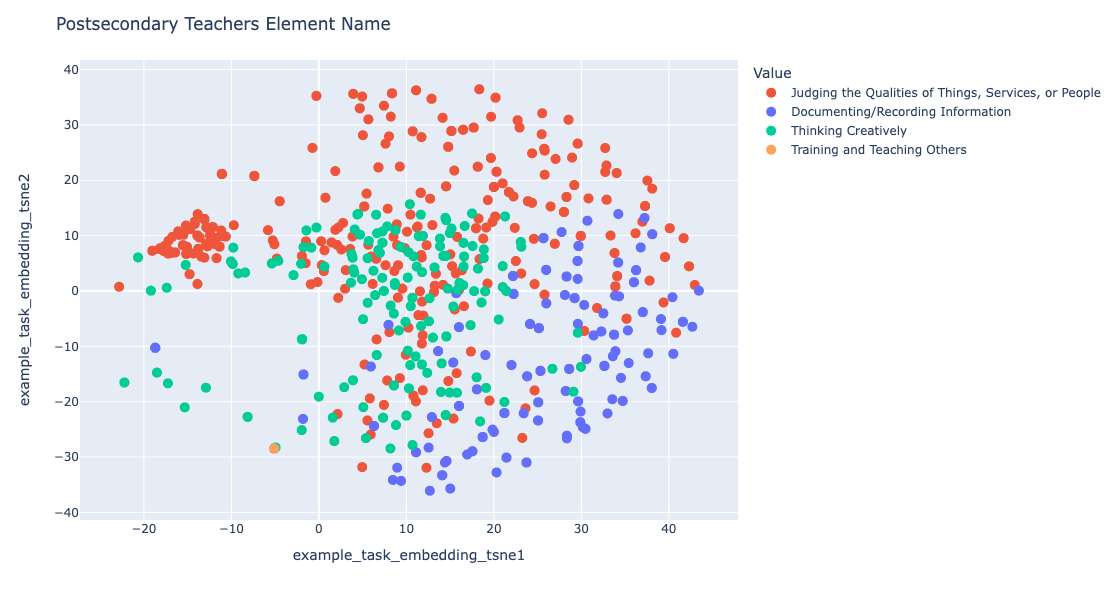

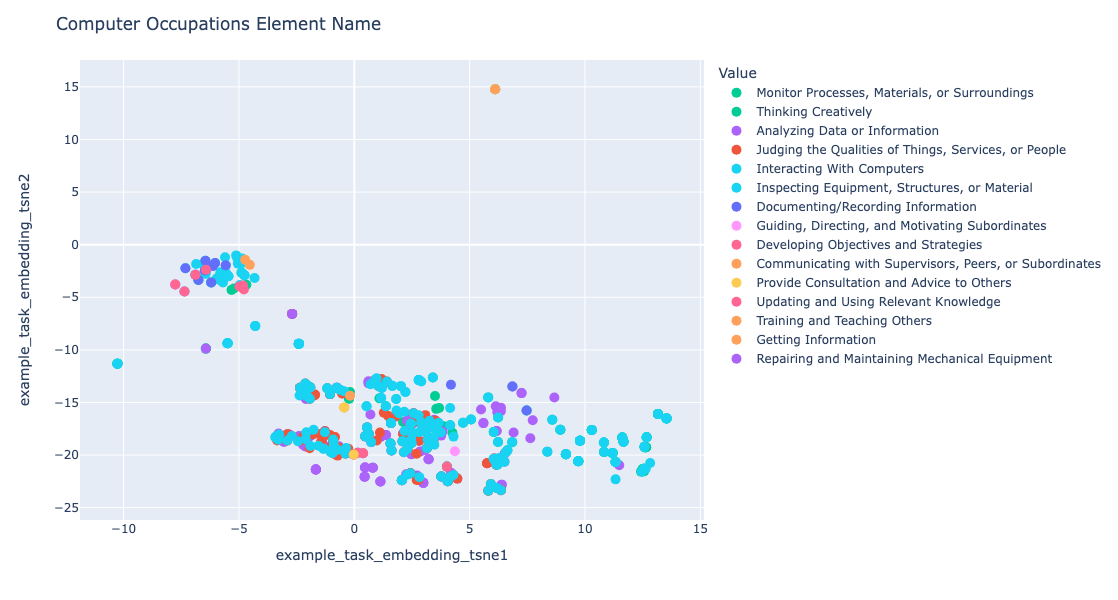

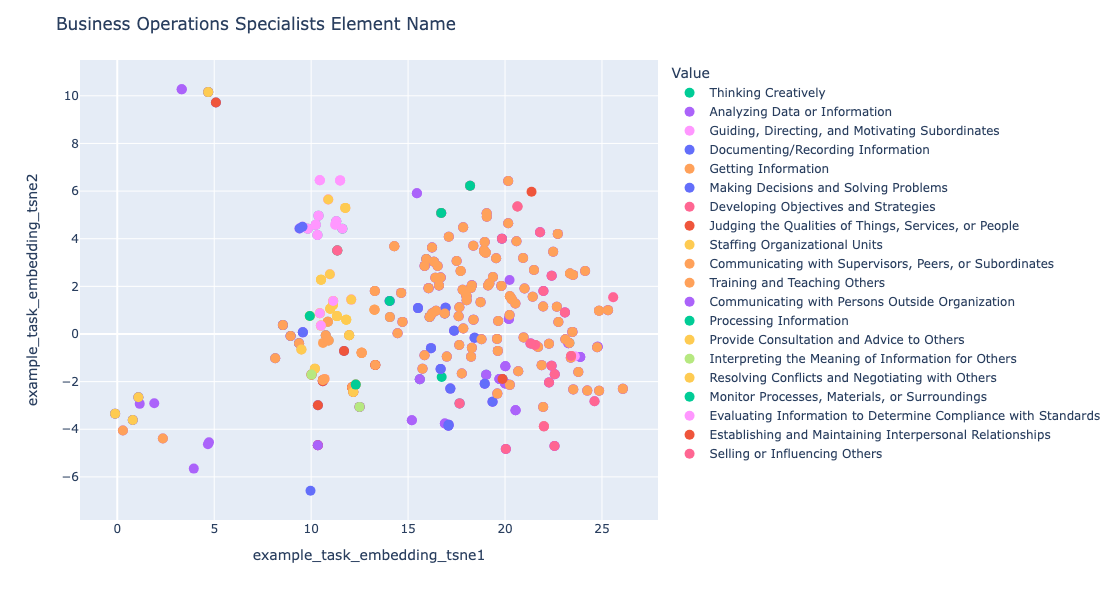

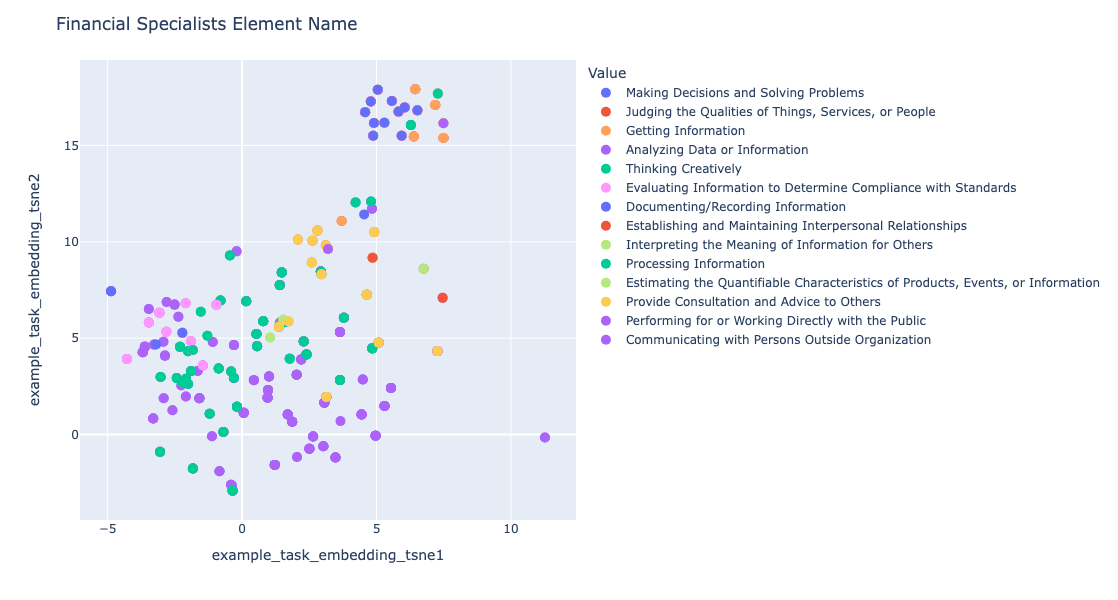

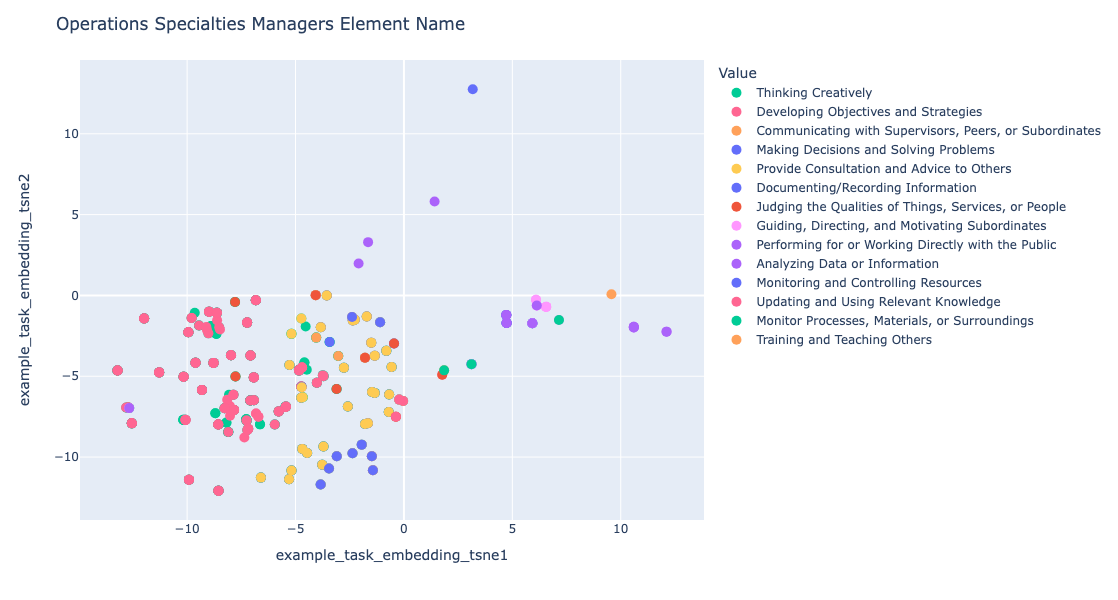

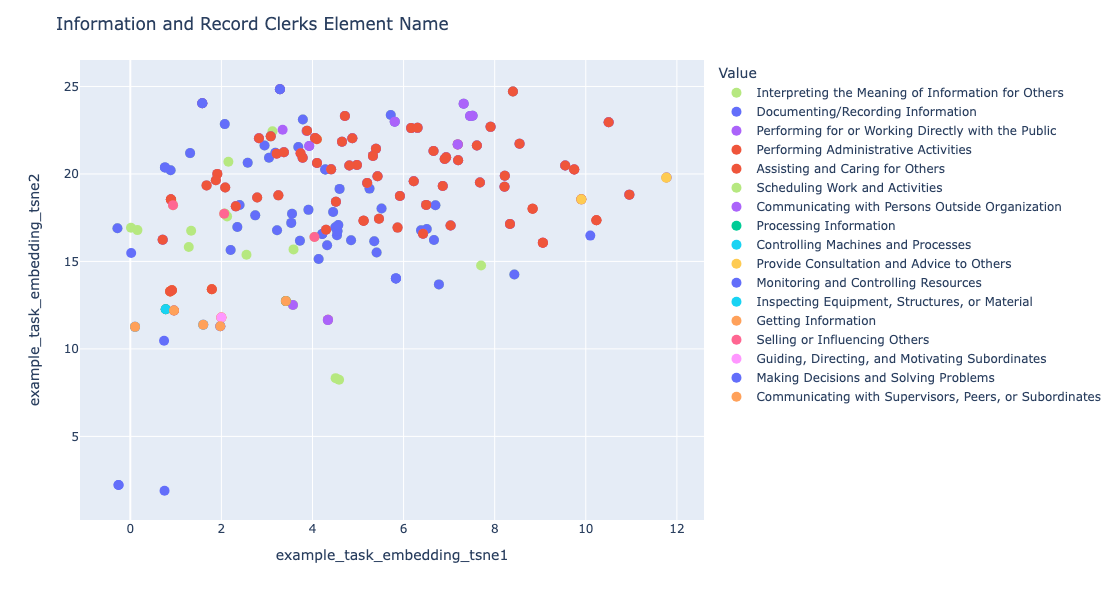

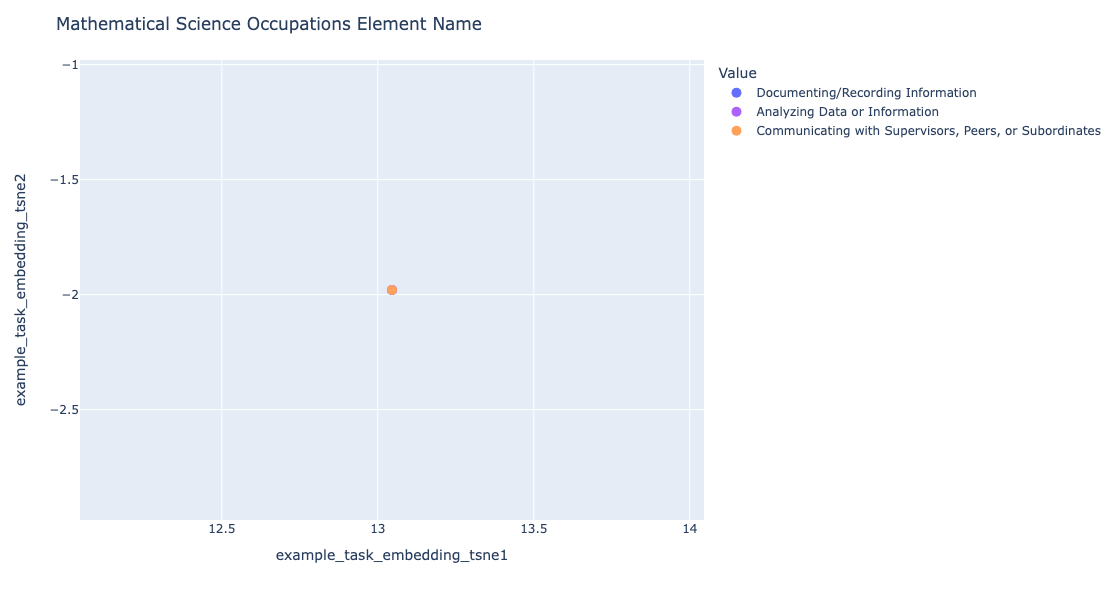

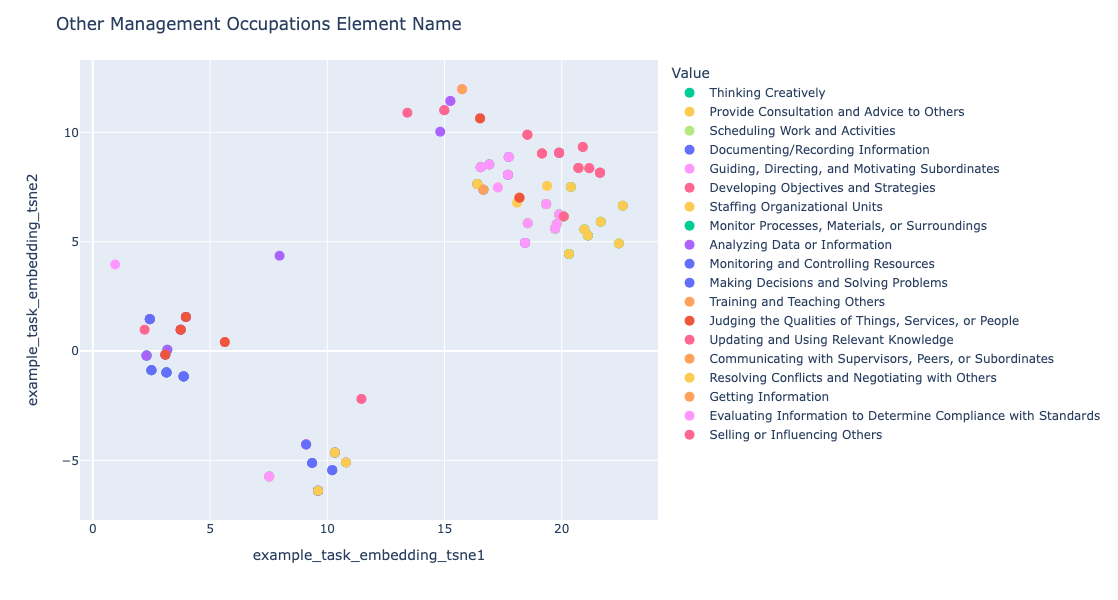

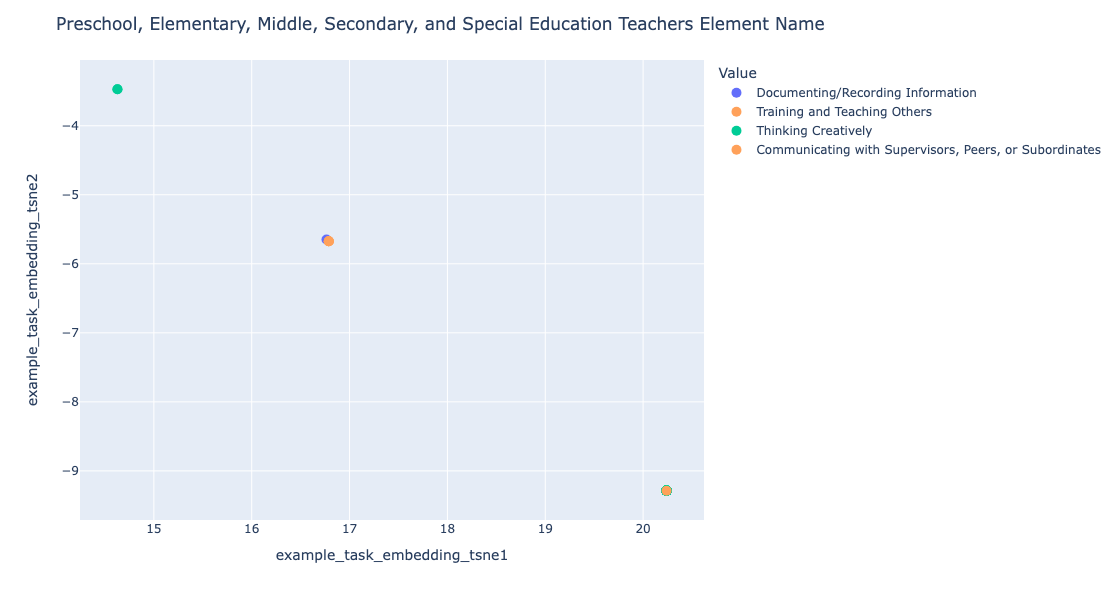

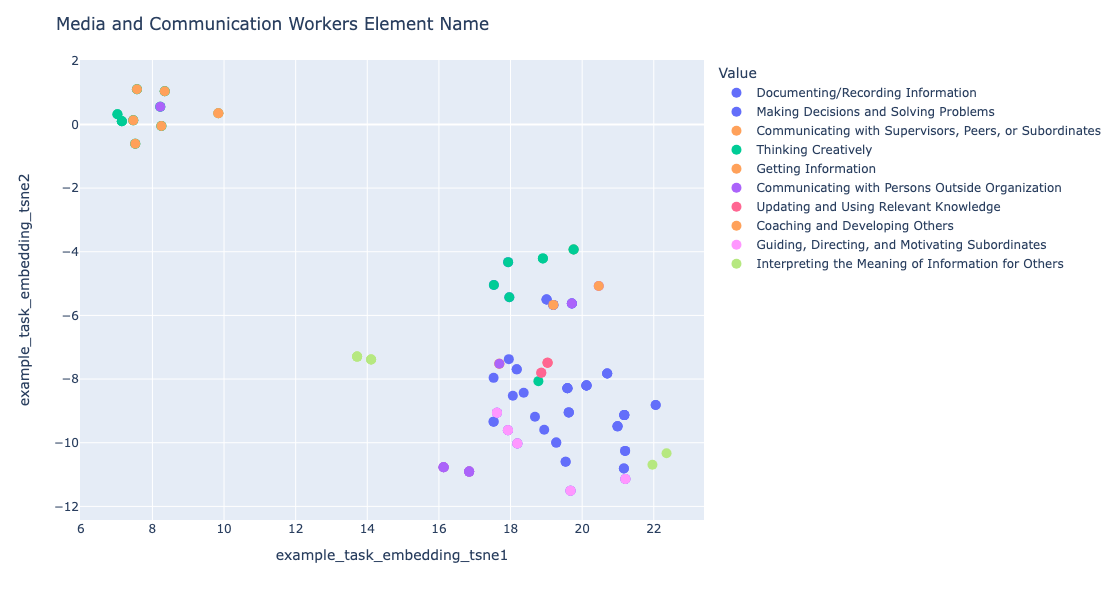

In [133]:
occ_groups = list(df.groupby("Minor Group Name")["organization_name"].count().sort_values(ascending=False).index)

value = "Element Name"
for occ_group in occ_groups[:10]:
    graph_df = df[df["Minor Group Name"] == occ_group]
    graph_df.head()
    # Plot using Plotly with clusters
    fig = px.scatter(graph_df, x='example_task_embedding_tsne1', y='example_task_embedding_tsne2',
                     color=value,
                     hover_data=['onet_task'],
                     color_discrete_map=color_map,
                     range_color=[0, .3],
                     labels={value: 'Value'})
    fig.update_traces(marker_size=10)                  
    
    fig.update_layout(
        title=f"{occ_group} {value}", 
        hovermode='closest',
        width=1000,  # Set the width of the figure
        height=600  # Set the height of the figure
    )
    fig.show()

In [98]:
len(lf["DWA ID"].unique())

517

In [89]:
len(pd.read_csv("../input/onet/Tasks to DWAs.csv")["DWA Title"].unique())

2070

In [119]:
df.to_csv("../output/df_tsne.csv")

In [134]:
len(df)

14068

In [ ]:
- socio economic status 
- hourly annual 
- pew research center website socio economic data
- location of jobs
- related occupation, group by most links
https://www.bls.gov/oes/tables.htm